In [2]:
#veri önişleme(data preprocessing)

In [3]:
#bölümler
#veri önişleme genel bakış
#aykırı gözlem analizi
#eksik veri analizi
#standartlaştırma
#değişken dönüşümleri

In [4]:
#eğer veriniz kötüyse makine öğrenmesi araçlarınız elverişsiz olacaktır

In [5]:
# veri temizleme(data cleaning & cleasing)
#basamakları
#gürültülü veri(noisy data)
#eksik veri analizi(missing data analysis)
#aykırı gözlem analizi(outlier analysis)

In [6]:
#veri standardizasyonu(Data standarzation,Feature scaling)
#basamakları
# 0 1 dönüşümü(normalization)
# z-skoruna dönüştürme(standardization)
# logaritmik dönüşüm (log transformation)

In [7]:
#veri indirgeme(data reduction)
#basamakları
#gözlem(observation) sayısının azaltılması
#değişken(variable) sayısının azaltılaması

In [8]:
#değişken dönüşümleri(variable transformation)
#basamakları
#Sürekli değişkenlerde dönüşümler
#Kategorik değişkenlerde dönüşümler

In [9]:
#aykırı gözlem
#genel verilerin dışında bir gözlem

In [10]:
import seaborn as sns 
df=sns.load_dataset("diamonds")
df=df.select_dtypes(["float64","int64"])
df.dropna()      
df.head()

,carat,depth,table,price,x,y,z
0,0.23,61.5,55.0,326,3.95,3.98,2.43
1,0.21,59.8,61.0,326,3.89,3.84,2.31
2,0.23,56.9,65.0,327,4.05,4.07,2.31
3,0.29,62.4,58.0,334,4.20,4.23,2.63
4,0.31,63.3,58.0,335,4.34,4.35,2.75


In [11]:
df.table.head()

0    55.0
1    61.0
2    65.0
3    58.0
4    58.0
Name: table, dtype: float64

In [12]:
df_table=df["table"]
df_table.head()

0    55.0
1    61.0
2    65.0
3    58.0
4    58.0
Name: table, dtype: float64

<AxesSubplot:xlabel='table'>

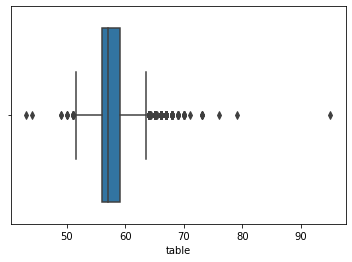

In [13]:
sns.boxplot(x=df_table)

In [14]:
Q1=df_table.quantile(0.25)
#df_table ın %25 inci değeri
Q1

56.0

In [15]:
Q3=df_table.quantile(0.75)
Q3

59.0

In [16]:
IQR=Q3-Q1
IQR

3.0

In [17]:
df_table.mean()

57.45718390804603

In [18]:
#şimdi ise boxplot yöntemi ile eşik değerleri hesaplıyacağız
alt_sinir= Q1-1.5*IQR
alt_sinir

51.5

In [19]:
ust_sinir=Q3+1.5*IQR
ust_sinir

63.5

In [20]:
((df_table < alt_sinir) | (df_table > ust_sinir))

0        False
1        False
2         True
3        False
4        False
         ...  
53935    False
53936    False
53937    False
53938    False
53939    False
Name: table, Length: 53940, dtype: bool

In [21]:
aykiri_tf = (df_table < alt_sinir)
aykiri_tf.head()

0    False
1    False
2    False
3    False
4    False
Name: table, dtype: bool

In [22]:
df_table[aykiri_tf]

1515     51.0
3238     50.1
3979     51.0
4150     51.0
5979     49.0
7418     50.0
8853     51.0
11368    43.0
22701    49.0
25179    50.0
26387    51.0
33586    51.0
35633    44.0
45798    51.0
46040    51.0
47630    51.0
Name: table, dtype: float64

In [23]:
df_table[aykiri_tf].index
#bu şekilde sadece indexleri yakalıyabiliyoruz
#bu düzeltme işlemi yapmak istediğimize çok önemli

Int64Index([ 1515,  3238,  3979,  4150,  5979,  7418,  8853, 11368, 22701,
            25179, 26387, 33586, 35633, 45798, 46040, 47630],
           dtype='int64')

In [24]:
#aykırı değer problemini çözmek

In [25]:
df_table[((df_table < alt_sinir) | (df_table > ust_sinir))]

2        65.0
91       69.0
145      64.0
219      64.0
227      67.0
         ... 
53695    65.0
53697    65.0
53756    64.0
53757    64.0
53785    65.0
Name: table, Length: 605, dtype: float64

In [26]:
df.shape

(53940, 7)

In [27]:
#silme işlemi

In [28]:
import pandas as pd

In [29]:
type(df_table)
#pandas serisi formunda

pandas.core.series.Series

In [30]:
#şimdi pandas dataframemine çevirme işlemi gerçekleştireceğiz
df_table=pd.DataFrame(df_table)

In [31]:
df_table

,table
0,55.0
1,61.0
2,65.0
3,58.0
4,58.0
...,...
53935,57.0
53936,55.0
53937,60.0
53938,58.0


In [32]:
df_table.shape

(53940, 1)

In [33]:
t_df=df_table[~((df_table<(alt_sinir))|(df_table>(ust_sinir))).any(axis=1)]
# ~ bu işare koşulu sağlamayanları al demektir               
#any axis=1 sütun bazında işlem yapmak istediğimizi belirtiyor

In [34]:
t_df

,table
0,55.0
1,61.0
3,58.0
4,58.0
5,57.0
...,...
53935,57.0
53936,55.0
53937,60.0
53938,58.0


In [35]:
t_df.shape

(53335, 1)

In [36]:
#Ortalama ile doldurma

In [37]:
import seaborn as sns 
df=sns.load_dataset("diamonds")
df=df.select_dtypes(["float64","int64"])
df.dropna()      
df.head()

,carat,depth,table,price,x,y,z
0,0.23,61.5,55.0,326,3.95,3.98,2.43
1,0.21,59.8,61.0,326,3.89,3.84,2.31
2,0.23,56.9,65.0,327,4.05,4.07,2.31
3,0.29,62.4,58.0,334,4.20,4.23,2.63
4,0.31,63.3,58.0,335,4.34,4.35,2.75


In [38]:
df.table.head()

0    55.0
1    61.0
2    65.0
3    58.0
4    58.0
Name: table, dtype: float64

In [39]:
df_table=df["table"]
df_table.head()

0    55.0
1    61.0
2    65.0
3    58.0
4    58.0
Name: table, dtype: float64

In [40]:
aykiri_tf.head()

0    False
1    False
2    False
3    False
4    False
Name: table, dtype: bool

In [41]:
#daha demin aykırı değerleri sildik şimdi ise ortalama değeri ile değiştirmek istiyoruz

In [42]:
df_table[aykiri_tf]

1515     51.0
3238     50.1
3979     51.0
4150     51.0
5979     49.0
7418     50.0
8853     51.0
11368    43.0
22701    49.0
25179    50.0
26387    51.0
33586    51.0
35633    44.0
45798    51.0
46040    51.0
47630    51.0
Name: table, dtype: float64

In [43]:
df_table.mean()

57.45718390804603

In [44]:
df_table[aykiri_tf]=df_table.mean()

/var/folders/sd/536xxkf96tl0x310zhjjdv680000gn/T/ipykernel_3632/2622707348.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_table[aykiri_tf]=df_table.mean()


In [45]:
df_table[aykiri_tf]
#yerlerine ortalama değeri atanmış oldu

1515     57.457184
3238     57.457184
3979     57.457184
4150     57.457184
5979     57.457184
7418     57.457184
8853     57.457184
11368    57.457184
22701    57.457184
25179    57.457184
26387    57.457184
33586    57.457184
35633    57.457184
45798    57.457184
46040    57.457184
47630    57.457184
Name: table, dtype: float64

In [46]:
### son yöntem baskılama yöntemi

In [47]:
# bu yöntemde üst sınırda ise üst sınıra eşitlenir 
#alt sınırda ise alt sınıra eşitlenir

In [48]:
import seaborn as sns 
df=sns.load_dataset("diamonds")
df=df.select_dtypes(["float64","int64"])
df.dropna()      
df.head()

,carat,depth,table,price,x,y,z
0,0.23,61.5,55.0,326,3.95,3.98,2.43
1,0.21,59.8,61.0,326,3.89,3.84,2.31
2,0.23,56.9,65.0,327,4.05,4.07,2.31
3,0.29,62.4,58.0,334,4.20,4.23,2.63
4,0.31,63.3,58.0,335,4.34,4.35,2.75


In [49]:
df_table=df["table"]

In [50]:
df_table[aykiri_tf]

1515     51.0
3238     50.1
3979     51.0
4150     51.0
5979     49.0
7418     50.0
8853     51.0
11368    43.0
22701    49.0
25179    50.0
26387    51.0
33586    51.0
35633    44.0
45798    51.0
46040    51.0
47630    51.0
Name: table, dtype: float64

In [51]:
df_table[aykiri_tf]=alt_sinir

/var/folders/sd/536xxkf96tl0x310zhjjdv680000gn/T/ipykernel_3632/3567973976.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_table[aykiri_tf]=alt_sinir


In [52]:
df_table[aykiri_tf]

1515     51.5
3238     51.5
3979     51.5
4150     51.5
5979     51.5
7418     51.5
8853     51.5
11368    51.5
22701    51.5
25179    51.5
26387    51.5
33586    51.5
35633    51.5
45798    51.5
46040    51.5
47630    51.5
Name: table, dtype: float64

In [53]:
#üç farklı yaklasıma bakımış olduk bunlar sırasıyla
#silme
#ortalama
#baskılama

In [54]:
###çok değişkenli aykırı gözlem analizi

In [55]:
#lof yöntemini yani local outlier factor yöntemini kullanıcağız
#lof her bir gözleme birimi için bize bir skor veriyor

In [56]:
import seaborn as sns 
df=sns.load_dataset("diamonds")
df=df.select_dtypes(["float64","int64"])
df.dropna()      
df.head()

,carat,depth,table,price,x,y,z
0,0.23,61.5,55.0,326,3.95,3.98,2.43
1,0.21,59.8,61.0,326,3.89,3.84,2.31
2,0.23,56.9,65.0,327,4.05,4.07,2.31
3,0.29,62.4,58.0,334,4.20,4.23,2.63
4,0.31,63.3,58.0,335,4.34,4.35,2.75


In [57]:
import numpy as np
from sklearn.neighbors import LocalOutlierFactor

In [58]:
clf=LocalOutlierFactor(n_neighbors=20,contamination=0.1)

In [59]:
clf.fit_predict(df)

array([-1, -1, -1, ...,  1,  1,  1])

In [60]:
df_scores=clf.negative_outlier_factor_

In [61]:
df_scores

array([-1.58352526, -1.59732899, -1.62278873, ..., -1.06721815,
       -1.00809552, -1.00849038])

In [62]:
df_scores[0:10]

array([-1.58352526, -1.59732899, -1.62278873, -1.33002541, -1.30712521,
       -1.28408436, -1.28428162, -1.26458706, -1.28422952, -1.27351342])

In [63]:
np.sort(df_scores[0:20])

array([-1.62278873, -1.59732899, -1.58352526, -1.33002541, -1.30712521,
       -1.28428162, -1.28422952, -1.28408436, -1.27351342, -1.26458706,
       -1.23611906, -1.21093135, -1.20830179, -1.17637026, -1.14305176,
       -1.13307628, -1.13060731, -1.11364018, -1.08139269, -1.08093519])

In [64]:
np.sort(df_scores)[0:20]

array([-8.60430658, -8.20889984, -5.86084355, -4.98415175, -4.81502092,
       -4.81502092, -4.61522833, -4.37081214, -4.29842288, -4.10492387,
       -4.0566648 , -4.01831733, -3.94882806, -3.82378797, -3.80135297,
       -3.75680919, -3.65947378, -3.59249261, -3.55564138, -3.47157375])

In [65]:
esik_deger=np.sort(df_scores)[13]
esik_deger

-3.823787967755565

In [66]:
aykiri_tf=df_scores > esik_deger

In [67]:
aykiri_tf

array([ True,  True,  True, ...,  True,  True,  True])

In [68]:
#silme yöntemi
yeni_df=df[df_scores > esik_deger]
yeni_df
#eşik değerin üzerinde olanları getirdik
#aykırı olmayan değerlere eriştik

,carat,depth,table,price,x,y,z
0,0.23,61.5,55.0,326,3.95,3.98,2.43
1,0.21,59.8,61.0,326,3.89,3.84,2.31
2,0.23,56.9,65.0,327,4.05,4.07,2.31
3,0.29,62.4,58.0,334,4.20,4.23,2.63
4,0.31,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...
53935,0.72,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,61.0,58.0,2757,6.15,6.12,3.74


In [69]:
df[df_scores < esik_deger]
#aykırı gözlemler
#çok değişkenli bir biçimde aykırı gözlemler incelendiğinde daha az sayıda gözlem geliyor

,carat,depth,table,price,x,y,z
6341,1.00,44.0,53.0,4032,6.31,6.24,4.12
10377,1.09,43.0,54.0,4778,6.53,6.55,4.12
24067,2.00,58.9,57.0,12210,8.09,58.90,8.06
35633,0.29,62.8,44.0,474,4.20,4.24,2.65
36503,0.30,51.0,67.0,945,4.67,4.62,2.37
38840,0.73,70.8,55.0,1049,5.51,5.34,3.84
41918,1.03,78.2,54.0,1262,5.72,5.59,4.42
45688,0.70,71.6,55.0,1696,5.47,5.28,3.85
48410,0.51,61.8,54.7,1970,5.12,5.15,31.80
49189,0.51,61.8,55.0,2075,5.15,31.80,5.12


In [70]:
#baskılama yöntemi

In [71]:
df[df_scores==esik_deger]
#eşik değere karşılık gelen değer

,carat,depth,table,price,x,y,z
31230,0.45,68.6,57.0,756,4.73,4.5,3.19


In [72]:
baski_deger=df[df_scores==esik_deger]
baski_deger

,carat,depth,table,price,x,y,z
31230,0.45,68.6,57.0,756,4.73,4.5,3.19


In [73]:
aykirilar=df[~aykiri_tf]
aykirilar

,carat,depth,table,price,x,y,z
6341,1.00,44.0,53.0,4032,6.31,6.24,4.12
10377,1.09,43.0,54.0,4778,6.53,6.55,4.12
24067,2.00,58.9,57.0,12210,8.09,58.90,8.06
31230,0.45,68.6,57.0,756,4.73,4.50,3.19
35633,0.29,62.8,44.0,474,4.20,4.24,2.65
36503,0.30,51.0,67.0,945,4.67,4.62,2.37
38840,0.73,70.8,55.0,1049,5.51,5.34,3.84
41918,1.03,78.2,54.0,1262,5.72,5.59,4.42
45688,0.70,71.6,55.0,1696,5.47,5.28,3.85
48410,0.51,61.8,54.7,1970,5.12,5.15,31.80


In [74]:
#bu işlemler sonucu index değerlerinde istenmeyen sonuçlar elde edilebiliyor

In [75]:
aykirilar.to_records(index=False)
#numpy arrayine çevirdi indexlerinden kurtulmuş olduk

rec.array([(1.  , 44. , 53. ,  4032, 6.31,  6.24,  4.12),
           (1.09, 43. , 54. ,  4778, 6.53,  6.55,  4.12),
           (2.  , 58.9, 57. , 12210, 8.09, 58.9 ,  8.06),
           (0.45, 68.6, 57. ,   756, 4.73,  4.5 ,  3.19),
           (0.29, 62.8, 44. ,   474, 4.2 ,  4.24,  2.65),
           (0.3 , 51. , 67. ,   945, 4.67,  4.62,  2.37),
           (0.73, 70.8, 55. ,  1049, 5.51,  5.34,  3.84),
           (1.03, 78.2, 54. ,  1262, 5.72,  5.59,  4.42),
           (0.7 , 71.6, 55. ,  1696, 5.47,  5.28,  3.85),
           (0.51, 61.8, 54.7,  1970, 5.12,  5.15, 31.8 ),
           (0.51, 61.8, 55. ,  2075, 5.15, 31.8 ,  5.12),
           (0.81, 68.8, 79. ,  2301, 5.26,  5.2 ,  3.58),
           (0.5 , 79. , 73. ,  2579, 5.21,  5.18,  4.09),
           (0.5 , 79. , 73. ,  2579, 5.21,  5.18,  4.09)],
          dtype=[('carat', '<f8'), ('depth', '<f8'), ('table', '<f8'), ('price', '<i8'), ('x', '<f8'), ('y', '<f8'), ('z', '<f8')])

In [76]:
res=aykirilar.to_records(index=False)
res

rec.array([(1.  , 44. , 53. ,  4032, 6.31,  6.24,  4.12),
           (1.09, 43. , 54. ,  4778, 6.53,  6.55,  4.12),
           (2.  , 58.9, 57. , 12210, 8.09, 58.9 ,  8.06),
           (0.45, 68.6, 57. ,   756, 4.73,  4.5 ,  3.19),
           (0.29, 62.8, 44. ,   474, 4.2 ,  4.24,  2.65),
           (0.3 , 51. , 67. ,   945, 4.67,  4.62,  2.37),
           (0.73, 70.8, 55. ,  1049, 5.51,  5.34,  3.84),
           (1.03, 78.2, 54. ,  1262, 5.72,  5.59,  4.42),
           (0.7 , 71.6, 55. ,  1696, 5.47,  5.28,  3.85),
           (0.51, 61.8, 54.7,  1970, 5.12,  5.15, 31.8 ),
           (0.51, 61.8, 55. ,  2075, 5.15, 31.8 ,  5.12),
           (0.81, 68.8, 79. ,  2301, 5.26,  5.2 ,  3.58),
           (0.5 , 79. , 73. ,  2579, 5.21,  5.18,  4.09),
           (0.5 , 79. , 73. ,  2579, 5.21,  5.18,  4.09)],
          dtype=[('carat', '<f8'), ('depth', '<f8'), ('table', '<f8'), ('price', '<i8'), ('x', '<f8'), ('y', '<f8'), ('z', '<f8')])

In [77]:
res[:]=baski_deger.to_records(index=False)

In [78]:
res

rec.array([(0.45, 68.6, 57., 756, 4.73, 4.5, 3.19),
           (0.45, 68.6, 57., 756, 4.73, 4.5, 3.19),
           (0.45, 68.6, 57., 756, 4.73, 4.5, 3.19),
           (0.45, 68.6, 57., 756, 4.73, 4.5, 3.19),
           (0.45, 68.6, 57., 756, 4.73, 4.5, 3.19),
           (0.45, 68.6, 57., 756, 4.73, 4.5, 3.19),
           (0.45, 68.6, 57., 756, 4.73, 4.5, 3.19),
           (0.45, 68.6, 57., 756, 4.73, 4.5, 3.19),
           (0.45, 68.6, 57., 756, 4.73, 4.5, 3.19),
           (0.45, 68.6, 57., 756, 4.73, 4.5, 3.19),
           (0.45, 68.6, 57., 756, 4.73, 4.5, 3.19),
           (0.45, 68.6, 57., 756, 4.73, 4.5, 3.19),
           (0.45, 68.6, 57., 756, 4.73, 4.5, 3.19),
           (0.45, 68.6, 57., 756, 4.73, 4.5, 3.19)],
          dtype=[('carat', '<f8'), ('depth', '<f8'), ('table', '<f8'), ('price', '<i8'), ('x', '<f8'), ('y', '<f8'), ('z', '<f8')])

In [79]:
df[~aykiri_tf]
#yukarıdaki array'i bu dataframe içerisine yerleştirmemiz gerekiyor

,carat,depth,table,price,x,y,z
6341,1.00,44.0,53.0,4032,6.31,6.24,4.12
10377,1.09,43.0,54.0,4778,6.53,6.55,4.12
24067,2.00,58.9,57.0,12210,8.09,58.90,8.06
31230,0.45,68.6,57.0,756,4.73,4.50,3.19
35633,0.29,62.8,44.0,474,4.20,4.24,2.65
36503,0.30,51.0,67.0,945,4.67,4.62,2.37
38840,0.73,70.8,55.0,1049,5.51,5.34,3.84
41918,1.03,78.2,54.0,1262,5.72,5.59,4.42
45688,0.70,71.6,55.0,1696,5.47,5.28,3.85
48410,0.51,61.8,54.7,1970,5.12,5.15,31.80


In [80]:
import pandas as pd
df[~aykiri_tf]=pd.DataFrame(res,index=df[~aykiri_tf].index)

In [81]:
df[~aykiri_tf]
#orjinal veri seti içerisine yerleştirdik

,carat,depth,table,price,x,y,z
6341,0.45,68.6,57.0,756,4.73,4.5,3.19
10377,0.45,68.6,57.0,756,4.73,4.5,3.19
24067,0.45,68.6,57.0,756,4.73,4.5,3.19
31230,0.45,68.6,57.0,756,4.73,4.5,3.19
35633,0.45,68.6,57.0,756,4.73,4.5,3.19
36503,0.45,68.6,57.0,756,4.73,4.5,3.19
38840,0.45,68.6,57.0,756,4.73,4.5,3.19
41918,0.45,68.6,57.0,756,4.73,4.5,3.19
45688,0.45,68.6,57.0,756,4.73,4.5,3.19
48410,0.45,68.6,57.0,756,4.73,4.5,3.19


In [82]:
#eksik veri analizi(missing data analysis)
#incelenen veri setinde gözlemlerde eksik olup olmamasını ifade eder
#eksik verilerin direk çıkarılması modellerin kalitesini düşürecektir

In [83]:
#eksik veri çözümünde en önemlisi eksik veri türünü çözümlemektir

In [84]:
#silme yöntemleri
#yöntemler
#Gözlem yada değişken silme yöntemi
#Liste bazında silme yöntemi(Listwise method)
#Çiftler bazında silme yöntemi(Pairwise method)

In [85]:
#değer atama yöntemleri
#yöntemler
#ortanca,ortalama,medyan
#en benzer birime atama (hot deck)
#Dış kaynaklı atama

In [86]:
#tahmine dayalı yöntemler
#yöntemler
#makine öğrenmesi
#EM
#çoklu atama yöntemi

In [87]:
# eksik veri rassallığının incelenme yöntemleri
#görsel teknikler
#bağımsız iki örneklem t testi
#korelasyon testi
#Little'nin MCAR testi
#pratikte genel olarak 1 ve 4 uygulanır

In [88]:
#eksik veri hızlı çözüm

In [89]:
import pandas as pd
V1 = np.array([1,3,6,np.NaN,7,1,np.NaN,9,15])
V2 = np.array([7,np.NaN,5,8,12,np.NaN,np.NaN,2,3])
V3 = np.array([np.NaN,12,5,6,14,7,np.NaN,2,31])
df = pd.DataFrame(
        {"V1" : V1,
         "V2" : V2,
         "V3" : V3}        
)

df

,V1,V2,V3
0,1.0,7.0,NaN
1,3.0,NaN,12.0
2,6.0,5.0,5.0
3,NaN,8.0,6.0
4,7.0,12.0,14.0
5,1.0,NaN,7.0
6,NaN,NaN,NaN
7,9.0,2.0,2.0
8,15.0,3.0,31.0


In [90]:
df.isnull().sum()

V1    2
V2    3
V3    2
dtype: int64

In [91]:
#tam değerlerin sayısına da bu şekilde erişiyoruz
df.notnull().sum()

V1    7
V2    6
V3    7
dtype: int64

In [92]:
#veri setindeki toplam eksik değerede böyle erişebiliyoruz
df.isnull().sum().sum()

7

In [93]:
df.isnull()
#eksiklik var mı yokmu onu sormuş olduk
#eksik olan değer true ile gösterildi

,V1,V2,V3
0,False,False,True
1,False,True,False
2,False,False,False
3,True,False,False
4,False,False,False
5,False,True,False
6,True,True,True
7,False,False,False
8,False,False,False


In [94]:
df[df.isnull().any(axis=1)]
#en az bir tane eksik değer varsa getir demek any bunun için kullanıldı

,V1,V2,V3
0,1.0,7.0,NaN
1,3.0,NaN,12.0
3,NaN,8.0,6.0
5,1.0,NaN,7.0
6,NaN,NaN,NaN


In [95]:
df[df.notnull().all(axis=1)]
#hepsi tam olanları getirdik

,V1,V2,V3
2,6.0,5.0,5.0
4,7.0,12.0,14.0
7,9.0,2.0,2.0
8,15.0,3.0,31.0


In [96]:
df[df["V1"].notnull() & df["V2"].notnull() & df["V3"].notnull()]

,V1,V2,V3
2,6.0,5.0,5.0
4,7.0,12.0,14.0
7,9.0,2.0,2.0
8,15.0,3.0,31.0


In [97]:
#eksikliklerin direk silinmesi
df.dropna()
#kalıcı olarak değiştirmek için inplace kullanmalıyız

,V1,V2,V3
2,6.0,5.0,5.0
4,7.0,12.0,14.0
7,9.0,2.0,2.0
8,15.0,3.0,31.0


In [98]:
#basit değer atama

In [99]:
df["V1"].mean()

6.0

In [100]:
df["V1"].fillna(df["V1"].mean())

0     1.0
1     3.0
2     6.0
3     6.0
4     7.0
5     1.0
6     6.0
7     9.0
8    15.0
Name: V1, dtype: float64

In [101]:
df.apply(lambda x:x.fillna(x.mean()))
#burada her bir değişkeni yakala sonra onu sütunun ortalamasıyla doldur dedik

,V1,V2,V3
0,1.0,7.000000,11.0
1,3.0,6.166667,12.0
2,6.0,5.000000,5.0
3,6.0,8.000000,6.0
4,7.0,12.000000,14.0
5,1.0,6.166667,7.0
6,6.0,6.166667,11.0
7,9.0,2.000000,2.0
8,15.0,3.000000,31.0


In [102]:
#eksik veri yapısının görselleştirilmesi

In [103]:
#missingno kütüphanesini import edeceğim
!pip install missingno

In [104]:
import missingno as msno

<AxesSubplot:>

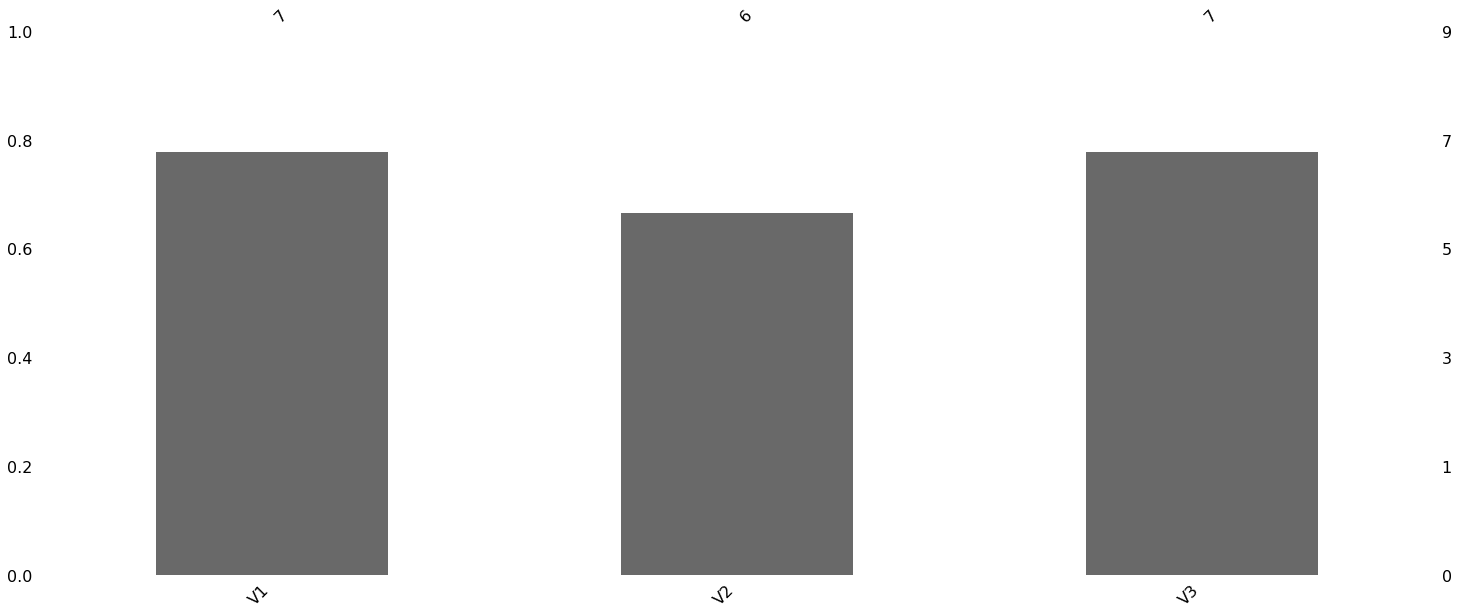

In [105]:
msno.bar(df)

<AxesSubplot:>

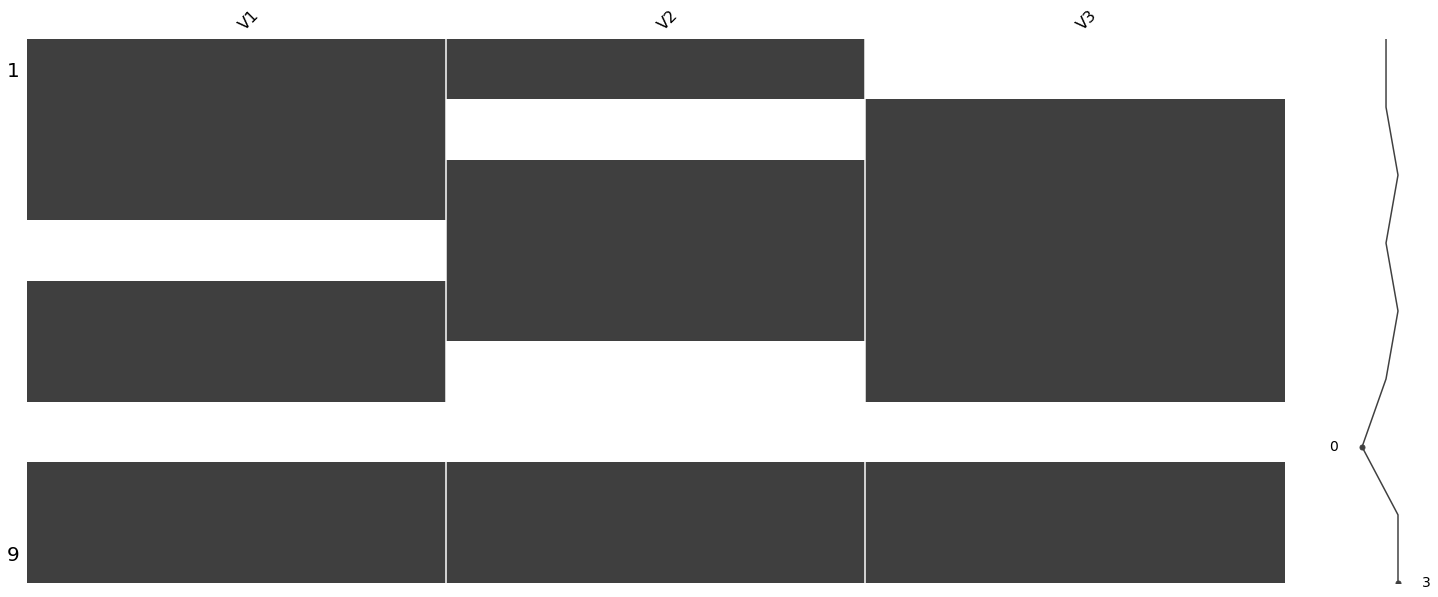

In [106]:
msno.matrix(df)
#burada sırayla dolu boşa göre gösteriyor

In [107]:
import seaborn as sns
df=sns.load_dataset("planets")
df.head()

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009


In [108]:
df.isnull().sum()

method              0
number              0
orbital_period     43
mass              522
distance          227
year                0
dtype: int64

In [109]:
df.notnull().sum()

method            1035
number            1035
orbital_period     992
mass               513
distance           808
year              1035
dtype: int64

<AxesSubplot:>

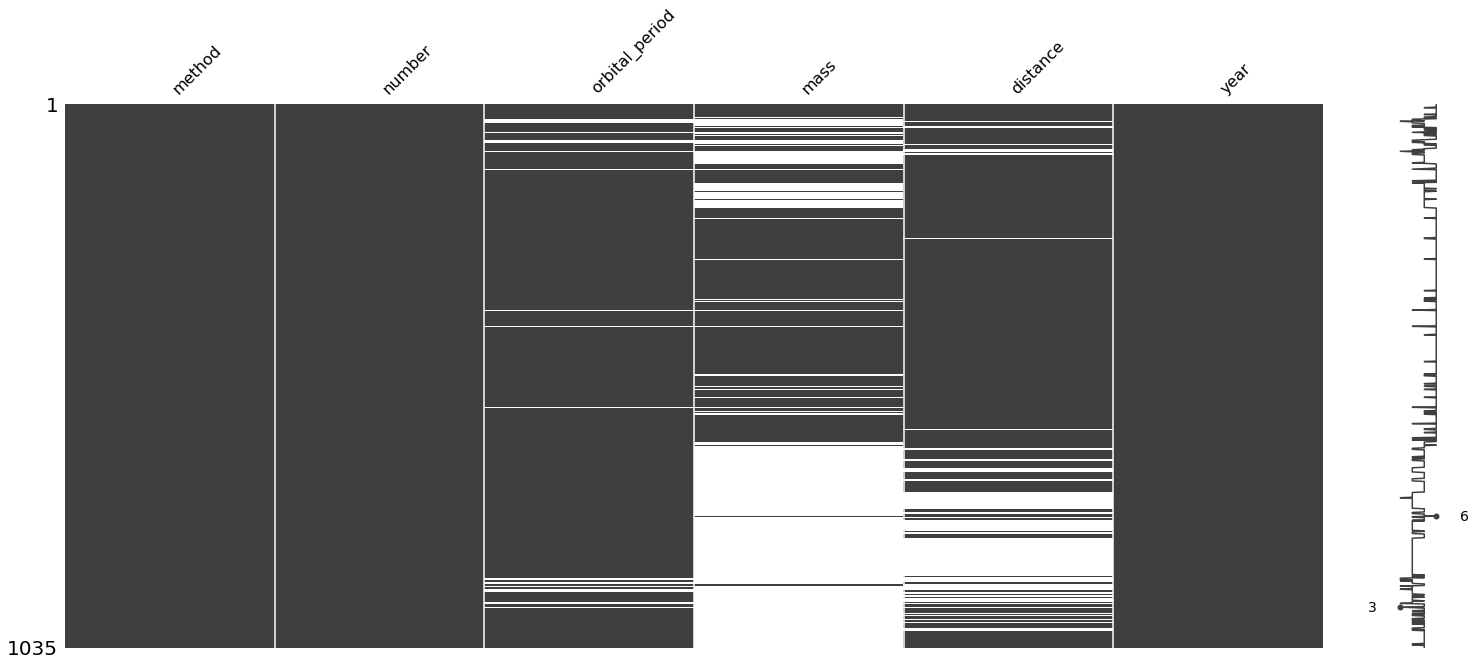

In [110]:
msno.matrix(df)
#tablonun sağ tarafında boş değer sayıları gösteriliyor
#gözlem 1:orbital period da ne zaman boşluk olduysa mass tada boşluk olmuş 
#yani bu aralarında bir ilişki olduğunu gösteriyor

<AxesSubplot:>

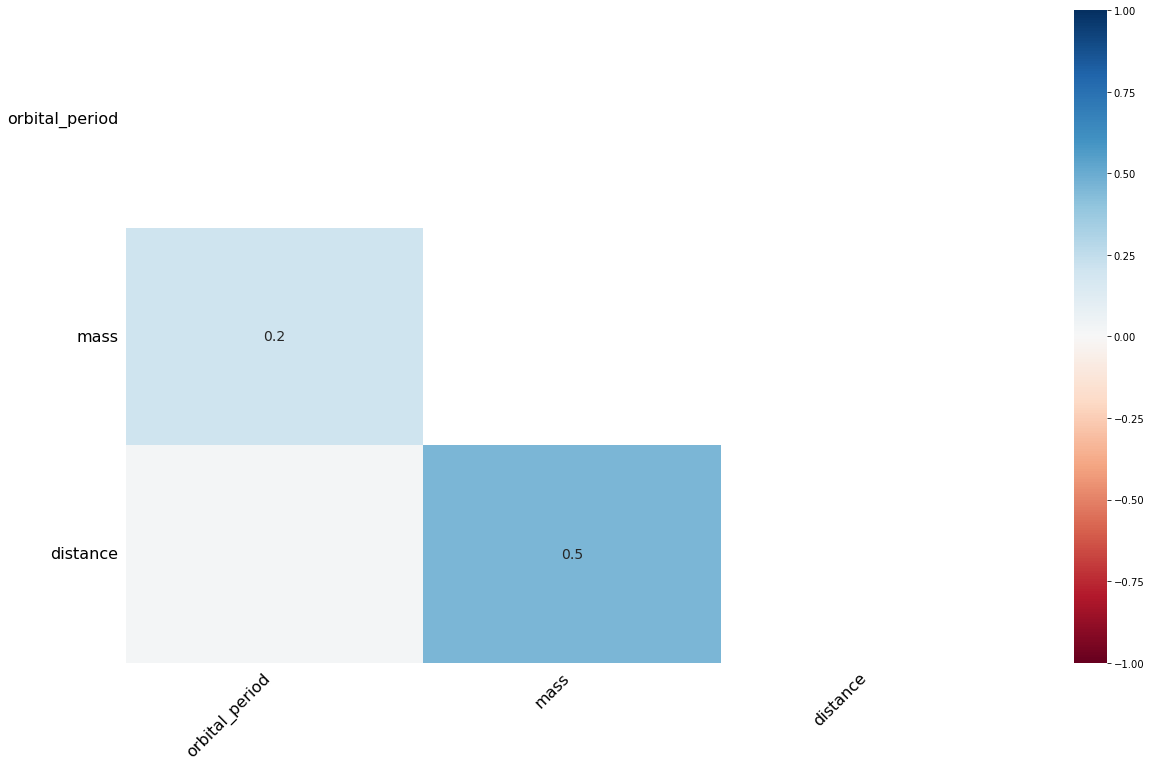

In [111]:
msno.heatmap(df)
#bu değişkenler arasındaki korelasyonu gösteriyor

In [112]:
#silme yöntemi 
#eksik değişkenleri silme işlemi

In [113]:
#en az bir eksik değere kadar silme işlemi
df.dropna().shape

(498, 6)

In [114]:
df.shape

(1035, 6)

In [115]:
import pandas as pd
V1 = np.array([1,3,6,np.NaN,7,1,np.NaN,9,15])
V2 = np.array([7,np.NaN,5,8,12,np.NaN,np.NaN,2,3])
V3 = np.array([np.NaN,12,5,6,14,7,np.NaN,2,31])
df = pd.DataFrame(
        {"V1" : V1,
         "V2" : V2,
         "V3" : V3}        
)

df

,V1,V2,V3
0,1.0,7.0,NaN
1,3.0,NaN,12.0
2,6.0,5.0,5.0
3,NaN,8.0,6.0
4,7.0,12.0,14.0
5,1.0,NaN,7.0
6,NaN,NaN,NaN
7,9.0,2.0,2.0
8,15.0,3.0,31.0


In [116]:
#en az bir eksik değere kadar silme
df.dropna()

,V1,V2,V3
2,6.0,5.0,5.0
4,7.0,12.0,14.0
7,9.0,2.0,2.0
8,15.0,3.0,31.0


In [117]:
df

,V1,V2,V3
0,1.0,7.0,NaN
1,3.0,NaN,12.0
2,6.0,5.0,5.0
3,NaN,8.0,6.0
4,7.0,12.0,14.0
5,1.0,NaN,7.0
6,NaN,NaN,NaN
7,9.0,2.0,2.0
8,15.0,3.0,31.0


In [118]:
#şimdi hepsi eksik ise siliyorum
df.dropna(how="all")

,V1,V2,V3
0,1.0,7.0,NaN
1,3.0,NaN,12.0
2,6.0,5.0,5.0
3,NaN,8.0,6.0
4,7.0,12.0,14.0
5,1.0,NaN,7.0
7,9.0,2.0,2.0
8,15.0,3.0,31.0


In [119]:
df.dropna(axis=1,how="all")
#tüm değerleri na olan değişkenleri silecek

,V1,V2,V3
0,1.0,7.0,NaN
1,3.0,NaN,12.0
2,6.0,5.0,5.0
3,NaN,8.0,6.0
4,7.0,12.0,14.0
5,1.0,NaN,7.0
6,NaN,NaN,NaN
7,9.0,2.0,2.0
8,15.0,3.0,31.0


In [120]:
df["sil_beni"]=np.nan

In [121]:
df

,V1,V2,V3,sil_beni
0,1.0,7.0,NaN,NaN
1,3.0,NaN,12.0,NaN
2,6.0,5.0,5.0,NaN
3,NaN,8.0,6.0,NaN
4,7.0,12.0,14.0,NaN
5,1.0,NaN,7.0,NaN
6,NaN,NaN,NaN,NaN
7,9.0,2.0,2.0,NaN
8,15.0,3.0,31.0,NaN


In [122]:
df.dropna(axis=1,how="all",inplace=True)
df

,V1,V2,V3
0,1.0,7.0,NaN
1,3.0,NaN,12.0
2,6.0,5.0,5.0
3,NaN,8.0,6.0
4,7.0,12.0,14.0
5,1.0,NaN,7.0
6,NaN,NaN,NaN
7,9.0,2.0,2.0
8,15.0,3.0,31.0


In [123]:
#basit değer atama yöntemleri

In [124]:
#sayısal değişkenlerde atama
df

,V1,V2,V3
0,1.0,7.0,NaN
1,3.0,NaN,12.0
2,6.0,5.0,5.0
3,NaN,8.0,6.0
4,7.0,12.0,14.0
5,1.0,NaN,7.0
6,NaN,NaN,NaN
7,9.0,2.0,2.0
8,15.0,3.0,31.0


In [125]:
df["V1"].fillna(0)

0     1.0
1     3.0
2     6.0
3     0.0
4     7.0
5     1.0
6     0.0
7     9.0
8    15.0
Name: V1, dtype: float64

In [126]:
#tüm değişkenler için birinci yol
df.apply(lambda x: x.fillna(x.mean()),axis=0)

,V1,V2,V3
0,1.0,7.000000,11.0
1,3.0,6.166667,12.0
2,6.0,5.000000,5.0
3,6.0,8.000000,6.0
4,7.0,12.000000,14.0
5,1.0,6.166667,7.0
6,6.0,6.166667,11.0
7,9.0,2.000000,2.0
8,15.0,3.000000,31.0


In [127]:
#tüm değişkenler için ikinci yol
df.fillna(df.mean()[:])
#bütün sütunları ortalaması ile doldurur

,V1,V2,V3
0,1.0,7.000000,11.0
1,3.0,6.166667,12.0
2,6.0,5.000000,5.0
3,6.0,8.000000,6.0
4,7.0,12.000000,14.0
5,1.0,6.166667,7.0
6,6.0,6.166667,11.0
7,9.0,2.000000,2.0
8,15.0,3.000000,31.0


In [129]:
df.fillna(df.mean()["V1":"V2"])

,V1,V2,V3
0,1.0,7.000000,NaN
1,3.0,6.166667,12.0
2,6.0,5.000000,5.0
3,6.0,8.000000,6.0
4,7.0,12.000000,14.0
5,1.0,6.166667,7.0
6,6.0,6.166667,NaN
7,9.0,2.000000,2.0
8,15.0,3.000000,31.0


In [131]:
df["V3"].fillna(df["V3"].median())

0     7.0
1    12.0
2     5.0
3     6.0
4    14.0
5     7.0
6     7.0
7     2.0
8    31.0
Name: V3, dtype: float64

In [132]:
#üçüncü yol 

In [133]:
df.where(pd.notna(df),df.mean(),axis="columns")

,V1,V2,V3
0,1.0,7.000000,11.0
1,3.0,6.166667,12.0
2,6.0,5.000000,5.0
3,6.0,8.000000,6.0
4,7.0,12.000000,14.0
5,1.0,6.166667,7.0
6,6.0,6.166667,11.0
7,9.0,2.000000,2.0
8,15.0,3.000000,31.0


In [136]:
#kategorik değişken kırılımında değer atama

In [137]:
V1 = np.array([1,3,6,np.NaN,7,1,np.NaN,9,15])
V2 = np.array([7,np.NaN,5,8,12,np.NaN,np.NaN,2,3])
V3 = np.array([np.NaN,12,5,6,14,7,np.NaN,2,31])
V4 = np.array(["IT","IT","IK","IK","IK","IK","IK","IT","IT"])

df = pd.DataFrame(
        {"maas" : V1,
         "V2" : V2,
         "V3" : V3,
        "departman" : V4}        
)

df

,maas,V2,V3,departman
0,1.0,7.0,NaN,IT
1,3.0,NaN,12.0,IT
2,6.0,5.0,5.0,IK
3,NaN,8.0,6.0,IK
4,7.0,12.0,14.0,IK
5,1.0,NaN,7.0,IK
6,NaN,NaN,NaN,IK
7,9.0,2.0,2.0,IT
8,15.0,3.0,31.0,IT


In [138]:
df.groupby("departman")["maas"]

In [140]:
df.groupby("departman")["maas"].mean()
#burada amacımız departman ortalamasını eksik değerlerin yerine doldurmak

departman
IK    4.666667
IT    7.000000
Name: maas, dtype: float64

In [142]:
df["maas"].fillna(df.groupby("departman")["maas"].transform("mean"))
#grupların ortalamasına göre doldurma işlemi yapıyoruz

0     1.000000
1     3.000000
2     6.000000
3     4.666667
4     7.000000
5     1.000000
6     4.666667
7     9.000000
8    15.000000
Name: maas, dtype: float64

In [143]:
#kategorik değişkenler için değer atama

In [144]:
import numpy as np
import pandas as pd
V1 = np.array([1,3,6,np.NaN,7,1,np.NaN,9,15])
V4 = np.array(["IT",np.nan,"IK","IK","IK","IK","IK","IT","IT"], dtype=object)

df = pd.DataFrame(
        {"maas" : V1,
        "departman" : V4}        
)

df

,maas,departman
0,1.0,IT
1,3.0,NaN
2,6.0,IK
3,NaN,IK
4,7.0,IK
5,1.0,IK
6,NaN,IK
7,9.0,IT
8,15.0,IT


In [145]:
#kategorik değişkenlerdeki eksik değeri doldurmanın en güzel yolu moddur

In [146]:
df["departman"].mode()

0    IK
Name: departman, dtype: object

In [147]:
df["departman"].mode()[0]

'IK'

In [149]:
df["departman"].fillna(df["departman"].mode()[0])
#gözlemleneceği üzere atama işlemi yapıldı

0    IT
1    IK
2    IK
3    IK
4    IK
5    IK
6    IK
7    IT
8    IT
Name: departman, dtype: object

In [150]:
#öncesindeki veya sonrasındaki değer ile doldurma

In [152]:
df["departman"].fillna(method="bfill")
#burada kendisinden sonra gelen değer ile doldurma işlemi yaptık

0    IT
1    IK
2    IK
3    IK
4    IK
5    IK
6    IK
7    IT
8    IT
Name: departman, dtype: object

In [153]:
df["departman"].fillna(method="ffill")
#önceki değer ile doldurma işlemi yaptık

0    IT
1    IT
2    IK
3    IK
4    IK
5    IK
6    IK
7    IT
8    IT
Name: departman, dtype: object

In [154]:
#tahmine dayalı değer atama yöntemleri

In [155]:
import seaborn as sns
import missingno as msno
df = sns.load_dataset('titanic')
df = df.select_dtypes(include = ['float64', 'int64'])
print(df.head())
df.isnull().sum()

   survived  pclass   age  sibsp  parch     fare
0         0       3  22.0      1      0   7.2500
1         1       1  38.0      1      0  71.2833
2         1       3  26.0      0      0   7.9250
3         1       1  35.0      1      0  53.1000
4         0       3  35.0      0      0   8.0500


survived      0
pclass        0
age         177
sibsp         0
parch         0
fare          0
dtype: int64

In [156]:
#tahmine dayalı yöntemlerle age değişkenini dolduracağım

In [178]:
!pip install ycimpute

In [185]:
from ycimpute.imputer import knnimput

In [186]:
var_names = list(df)
var_names
#burada değişkenelerin ismini tutuyoruz

['survived', 'pclass', 'age', 'sibsp', 'parch', 'fare']

In [187]:
n_df = np.array(df)
n_df[0:10]

array([[ 0.    ,  3.    , 22.    ,  1.    ,  0.    ,  7.25  ],
       [ 1.    ,  1.    , 38.    ,  1.    ,  0.    , 71.2833],
       [ 1.    ,  3.    , 26.    ,  0.    ,  0.    ,  7.925 ],
       [ 1.    ,  1.    , 35.    ,  1.    ,  0.    , 53.1   ],
       [ 0.    ,  3.    , 35.    ,  0.    ,  0.    ,  8.05  ],
       [ 0.    ,  3.    ,     nan,  0.    ,  0.    ,  8.4583],
       [ 0.    ,  1.    , 54.    ,  0.    ,  0.    , 51.8625],
       [ 0.    ,  3.    ,  2.    ,  3.    ,  1.    , 21.075 ],
       [ 1.    ,  3.    , 27.    ,  0.    ,  2.    , 11.1333],
       [ 1.    ,  2.    , 14.    ,  1.    ,  0.    , 30.0708]])

In [189]:
n_df.shape

(891, 6)

In [191]:
dff=knnimput.KNN(k=4).complete(n_df)
#buradaki k komşuluk sayısını ifade ediyor
#komşuluk algoritması bir makine öğrenmesi algoritmasıdır

Imputing row 1/891 with 0 missing, elapsed time: 0.126
Imputing row 101/891 with 0 missing, elapsed time: 0.129
Imputing row 201/891 with 0 missing, elapsed time: 0.129
Imputing row 301/891 with 1 missing, elapsed time: 0.130
Imputing row 401/891 with 0 missing, elapsed time: 0.130
Imputing row 501/891 with 0 missing, elapsed time: 0.131
Imputing row 601/891 with 0 missing, elapsed time: 0.132
Imputing row 701/891 with 0 missing, elapsed time: 0.132
Imputing row 801/891 with 0 missing, elapsed time: 0.133


In [193]:
type(dff)

numpy.ndarray

In [194]:
#pandas dataframine çeviriyoruz

In [196]:
dff=pd.DataFrame(dff,columns=var_names)
dff.head()

,survived,pclass,age,sibsp,parch,fare
0,0.0,3.0,22.0,1.0,0.0,7.2500
1,1.0,1.0,38.0,1.0,0.0,71.2833
2,1.0,3.0,26.0,0.0,0.0,7.9250
3,1.0,1.0,35.0,1.0,0.0,53.1000
4,0.0,3.0,35.0,0.0,0.0,8.0500


In [197]:
dff.isnull().sum()

survived    0
pclass      0
age         0
sibsp       0
parch       0
fare        0
dtype: int64

In [199]:
#şimdi aynı işlemin benzerini random forests algoritması ile gerçekleştireceğim

In [202]:
import seaborn as sns
import missingno as msno
df = sns.load_dataset('titanic')
df = df.select_dtypes(include = ['float64', 'int64'])
df.isnull().sum()

survived      0
pclass        0
age         177
sibsp         0
parch         0
fare          0
dtype: int64

In [204]:
var_names=list(df)
var_names

['survived', 'pclass', 'age', 'sibsp', 'parch', 'fare']

In [206]:
n_df=np.array(df)
n_df[0:10]

array([[ 0.    ,  3.    , 22.    ,  1.    ,  0.    ,  7.25  ],
       [ 1.    ,  1.    , 38.    ,  1.    ,  0.    , 71.2833],
       [ 1.    ,  3.    , 26.    ,  0.    ,  0.    ,  7.925 ],
       [ 1.    ,  1.    , 35.    ,  1.    ,  0.    , 53.1   ],
       [ 0.    ,  3.    , 35.    ,  0.    ,  0.    ,  8.05  ],
       [ 0.    ,  3.    ,     nan,  0.    ,  0.    ,  8.4583],
       [ 0.    ,  1.    , 54.    ,  0.    ,  0.    , 51.8625],
       [ 0.    ,  3.    ,  2.    ,  3.    ,  1.    , 21.075 ],
       [ 1.    ,  3.    , 27.    ,  0.    ,  2.    , 11.1333],
       [ 1.    ,  2.    , 14.    ,  1.    ,  0.    , 30.0708]])

In [214]:
from ycimpute.imputer import iterforest
dff=iterforest.IterImput().complete(n_df)
#hata versede boş değerleri dolduruyor

AttributeError: module 'ycimpute.imputer.iterforest' has no attribute 'IterImput'

In [213]:
dff.isnull().sum()

survived    0
pclass      0
age         0
sibsp       0
parch       0
fare        0
dtype: int64

In [216]:
dff=pd.DataFrame(dff,columns=var_names)
dff.head()

,survived,pclass,age,sibsp,parch,fare
0,0.0,3.0,22.0,1.0,0.0,7.2500
1,1.0,1.0,38.0,1.0,0.0,71.2833
2,1.0,3.0,26.0,0.0,0.0,7.9250
3,1.0,1.0,35.0,1.0,0.0,53.1000
4,0.0,3.0,35.0,0.0,0.0,8.0500


In [217]:
dff.isnull().sum()

survived    0
pclass      0
age         0
sibsp       0
parch       0
fare        0
dtype: int64

In [218]:
#EM algoritması ile doldurma işlemi

In [226]:
import seaborn as sns
import missingno as msno
df = sns.load_dataset('titanic')
df = df.select_dtypes(include = ['float64', 'int64'])

In [227]:
from ycimpute.imputer import EM

In [228]:
var_names=list(df)
n_df=np.array(df)

In [229]:
dff=EM().complete(n_df)
dff=pd.DataFrame(dff,columns=var_names)
dff.head()

,survived,pclass,age,sibsp,parch,fare
0,0.0,3.0,22.0,1.0,0.0,7.2500
1,1.0,1.0,38.0,1.0,0.0,71.2833
2,1.0,3.0,26.0,0.0,0.0,7.9250
3,1.0,1.0,35.0,1.0,0.0,53.1000
4,0.0,3.0,35.0,0.0,0.0,8.0500


In [231]:
dff.isnull().sum()

survived    0
pclass      0
age         0
sibsp       0
parch       0
fare        0
dtype: int64

In [233]:
#değişken standardizasyonu (veri standardizasyonu)

In [234]:
import numpy as np
import pandas as pd
V1 = np.array([1,3,6,5,7])
V2 = np.array([7,7,5,8,12])
V3 = np.array([6,12,5,6,14])
df = pd.DataFrame(
        {"V1" : V1,
         "V2" : V2,
         "V3" : V3})

df = df.astype(float)
df

,V1,V2,V3
0,1.0,7.0,6.0
1,3.0,7.0,12.0
2,6.0,5.0,5.0
3,5.0,8.0,6.0
4,7.0,12.0,14.0


In [235]:
#standardizasyon

In [236]:
from sklearn import preprocessing
preprocessing.scale(df)
#bütün değişkenleri standartlaştırmış oldu

array([[-1.57841037, -0.34554737, -0.70920814],
       [-0.64993368, -0.34554737,  0.92742603],
       [ 0.74278135, -1.2094158 , -0.98198051],
       [ 0.27854301,  0.08638684, -0.70920814],
       [ 1.2070197 ,  1.81412369,  1.47297076]])

In [237]:
df

,V1,V2,V3
0,1.0,7.0,6.0
1,3.0,7.0,12.0
2,6.0,5.0,5.0
3,5.0,8.0,6.0
4,7.0,12.0,14.0


In [238]:
#normalizasyon
#değerleri 1 ve 0 arasına dönüştürür

In [239]:
preprocessing.normalize(df)

array([[0.10783277, 0.75482941, 0.64699664],
       [0.21107926, 0.49251828, 0.84431705],
       [0.64699664, 0.53916387, 0.53916387],
       [0.4472136 , 0.71554175, 0.53665631],
       [0.35491409, 0.60842415, 0.70982818]])

In [ ]:
#min-max dönüşümü
#belirlediğimiz değerler arasına dönüştürme işlemi yapar bunlar data dışındaki bir aralıkta olabilir

In [243]:
scaler=preprocessing.MinMaxScaler(feature_range=(10,20))

In [244]:
scaler.fit_transform(df)

array([[10.        , 12.85714286, 11.11111111],
       [13.33333333, 12.85714286, 17.77777778],
       [18.33333333, 10.        , 10.        ],
       [16.66666667, 14.28571429, 11.11111111],
       [20.        , 20.        , 20.        ]])

In [ ]:
#değişken dönüşümleri 
#değişken dönüşümleri > standardizasyon

In [245]:
import seaborn as sns
df = sns.load_dataset('tips')
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [247]:
# 0-1 dönüşümü
# elinde kategorik değişkenler olabilir ama ben bunları nümerik olarak görmek istiyorum demektir

In [248]:
from sklearn.preprocessing import LabelEncoder

In [249]:
lbe=LabelEncoder()

In [255]:
df["yeni_sex"]=lbe.fit_transform(df["sex"])
#kadınlar 0 erkekler 1
df.head(10)

,total_bill,tip,sex,smoker,day,time,size,yeni_sex
0,16.99,1.01,Female,No,Sun,Dinner,2,0
1,10.34,1.66,Male,No,Sun,Dinner,3,1
2,21.01,3.50,Male,No,Sun,Dinner,3,1
3,23.68,3.31,Male,No,Sun,Dinner,2,1
4,24.59,3.61,Female,No,Sun,Dinner,4,0
5,25.29,4.71,Male,No,Sun,Dinner,4,1
6,8.77,2.00,Male,No,Sun,Dinner,2,1
7,26.88,3.12,Male,No,Sun,Dinner,4,1
8,15.04,1.96,Male,No,Sun,Dinner,2,1
9,14.78,3.23,Male,No,Sun,Dinner,2,1


In [262]:
df["sex"].value_counts().sum

<bound method NDFrame._add_numeric_operations.<locals>.sum of Male      157
Female     87
Name: sex, dtype: int64>

In [270]:
# 1 ve diğerleri dönüşümü

In [271]:
df["day"].str.contains("Sun")

0       True
1       True
2       True
3       True
4       True
       ...  
239    False
240    False
241    False
242    False
243    False
Name: day, Length: 244, dtype: bool

In [274]:
df["yeni_day"]=np.where(df["day"].str.contains("Sun"),1,0)
#where diyorki koşulu sağlayanlara 1 sağlamayanlara 0
df.head()

,total_bill,tip,sex,smoker,day,time,size,yeni_sex,yeni_day
0,16.99,1.01,Female,No,Sun,Dinner,2,0,1
1,10.34,1.66,Male,No,Sun,Dinner,3,1,1
2,21.01,3.50,Male,No,Sun,Dinner,3,1,1
3,23.68,3.31,Male,No,Sun,Dinner,2,1,1
4,24.59,3.61,Female,No,Sun,Dinner,4,0,1


In [275]:
# çok sınıflı dönüşüm

In [276]:
from sklearn.preprocessing import LabelEncoder
lbe=LabelEncoder()

In [279]:
lbe.fit_transform(df["day"])
#bu duruma çok dikkat edilmeli çünkü nümerik fark varmış gibi bir değer aldı
#bu durumda one hot encoding yapmalıyız yani one hot dönüşümü

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 3])

In [282]:
# One-hot dönüşümü ve Dummy tuzağı

In [284]:
df_one_hot=pd.get_dummies(df,columns=["sex"],prefix=["sex"])
#prefix one hot dönüşümü yaptığımız fonksiyonun argümanı

In [287]:
df_one_hot
#one hot dönüşümü ile cinsiyet üzerinde daha güzel bir dönüşüm elde ettik
#bir değişkenin diğeri üzerinden oluşturulması dummy değişken tuzağıdır

,total_bill,tip,smoker,day,time,size,yeni_sex,yeni_day,sex_Male,sex_Female
0,16.99,1.01,No,Sun,Dinner,2,0,1,0,1
1,10.34,1.66,No,Sun,Dinner,3,1,1,1,0
2,21.01,3.50,No,Sun,Dinner,3,1,1,1,0
3,23.68,3.31,No,Sun,Dinner,2,1,1,1,0
4,24.59,3.61,No,Sun,Dinner,4,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...
239,29.03,5.92,No,Sat,Dinner,3,1,0,1,0
240,27.18,2.00,Yes,Sat,Dinner,2,0,0,0,1
241,22.67,2.00,Yes,Sat,Dinner,2,1,0,1,0
242,17.82,1.75,No,Sat,Dinner,2,1,0,1,0


In [288]:
pd.get_dummies(df,columns=["day"],prefix=["day"]).head()

,total_bill,tip,sex,smoker,time,size,yeni_sex,yeni_day,day_Thur,day_Fri,day_Sat,day_Sun
0,16.99,1.01,Female,No,Dinner,2,0,1,0,0,0,1
1,10.34,1.66,Male,No,Dinner,3,1,1,0,0,0,1
2,21.01,3.50,Male,No,Dinner,3,1,1,0,0,0,1
3,23.68,3.31,Male,No,Dinner,2,1,1,0,0,0,1
4,24.59,3.61,Female,No,Dinner,4,0,1,0,0,0,1


In [293]:
# One-hot dönüşümünün faydaları
# nümerik değerlere dönüştürerek kullanıyoruz


In [294]:
## Veri standadizasyonu & Değişken dönüşümü

In [295]:
# stadartlaştırma

In [296]:
import numpy as np
import pandas as pd
V1 = np.array([1,3,6,5,7])
V2 = np.array([7,7,5,8,12])
V3 = np.array([6,12,5,6,14])
df = pd.DataFrame(
        {"V1" : V1,
         "V2" : V2,
         "V3" : V3})

df = df.astype(float)
df

,V1,V2,V3
0,1.0,7.0,6.0
1,3.0,7.0,12.0
2,6.0,5.0,5.0
3,5.0,8.0,6.0
4,7.0,12.0,14.0


In [299]:
from sklearn import preprocessing

In [300]:
# standartlaştırma

In [314]:
preprocessing.scale(df)
#ortalaması bu standart sapması bu şeklinde bir dönüşüm işlemi

array([[-1.57841037, -0.34554737, -0.70920814],
       [-0.64993368, -0.34554737,  0.92742603],
       [ 0.74278135, -1.2094158 , -0.98198051],
       [ 0.27854301,  0.08638684, -0.70920814],
       [ 1.2070197 ,  1.81412369,  1.47297076]])

In [302]:
# normalizasyon

In [303]:
preprocessing.normalize(df)

array([[0.10783277, 0.75482941, 0.64699664],
       [0.21107926, 0.49251828, 0.84431705],
       [0.64699664, 0.53916387, 0.53916387],
       [0.4472136 , 0.71554175, 0.53665631],
       [0.35491409, 0.60842415, 0.70982818]])

In [304]:
# Min-Max dönüşümü

In [307]:
scaler=preprocessing.MinMaxScaler(feature_range=(10,20))
scaler.fit_transform(df)

array([[10.        , 12.85714286, 11.11111111],
       [13.33333333, 12.85714286, 17.77777778],
       [18.33333333, 10.        , 10.        ],
       [16.66666667, 14.28571429, 11.11111111],
       [20.        , 20.        , 20.        ]])

In [308]:
# binarize dönüşüm

In [311]:
binarizer=preprocessing.Binarizer(threshold=5).fit(df)

In [313]:
binarizer.transform(df)

array([[0., 1., 1.],
       [0., 1., 1.],
       [1., 0., 0.],
       [0., 1., 1.],
       [1., 1., 1.]])

In [315]:
# 0-1 dönüşümü
# ama bu dönüşüm diğerlerinden farklı 
# kategorik değişken sürekli değişkene çevrilmiş oluyor

In [317]:
import seaborn as sns
tips=sns.load_dataset("tips")
df=tips.copy()
df_l=df.copy()

In [319]:
df_l.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [321]:
df_l["yeni_sex"]=df_l["sex"].cat.codes

In [322]:
df_l.head()

,total_bill,tip,sex,smoker,day,time,size,yeni_sex
0,16.99,1.01,Female,No,Sun,Dinner,2,1
1,10.34,1.66,Male,No,Sun,Dinner,3,0
2,21.01,3.50,Male,No,Sun,Dinner,3,0
3,23.68,3.31,Male,No,Sun,Dinner,2,0
4,24.59,3.61,Female,No,Sun,Dinner,4,1


In [323]:
# bu işlemi sklearn ilede yapabiliriz
lbe=preprocessing.LabelEncoder()

In [324]:
df_l["daha_yeni_sex"]=lbe.fit_transform(df_l["sex"])

In [327]:
df_l.head()
#bu yakaladığı değeri sıfırdan dönüştürmeye başlar cat.code ise 1 den başlar

,total_bill,tip,sex,smoker,day,time,size,yeni_sex,daha_yeni_sex
0,16.99,1.01,Female,No,Sun,Dinner,2,1,0
1,10.34,1.66,Male,No,Sun,Dinner,3,0,1
2,21.01,3.50,Male,No,Sun,Dinner,3,0,1
3,23.68,3.31,Male,No,Sun,Dinner,2,0,1
4,24.59,3.61,Female,No,Sun,Dinner,4,1,0


In [329]:
# 1 ve diğerleri 0 dönüşümü

In [331]:
df_l["yeni_gun"]=np.where(df_l["day"].str.contains("Sun"),1,0)

In [333]:
df_l.head(20)

,total_bill,tip,sex,smoker,day,time,size,yeni_sex,daha_yeni_sex,yeni_gun
0,16.99,1.01,Female,No,Sun,Dinner,2,1,0,1
1,10.34,1.66,Male,No,Sun,Dinner,3,0,1,1
2,21.01,3.50,Male,No,Sun,Dinner,3,0,1,1
3,23.68,3.31,Male,No,Sun,Dinner,2,0,1,1
4,24.59,3.61,Female,No,Sun,Dinner,4,1,0,1
5,25.29,4.71,Male,No,Sun,Dinner,4,0,1,1
6,8.77,2.00,Male,No,Sun,Dinner,2,0,1,1
7,26.88,3.12,Male,No,Sun,Dinner,4,0,1,1
8,15.04,1.96,Male,No,Sun,Dinner,2,0,1,1
9,14.78,3.23,Male,No,Sun,Dinner,2,0,1,1


In [337]:
# çok sınıflı dönüşüm

In [338]:
lbe = preprocessing.LabelEncoder()

In [339]:
df_l["daha_yeni_gun"]=lbe.fit_transform(df_l["day"])

In [340]:
df_l.head()

,total_bill,tip,sex,smoker,day,time,size,yeni_sex,daha_yeni_sex,yeni_gun,daha_yeni_gun
0,16.99,1.01,Female,No,Sun,Dinner,2,1,0,1,2
1,10.34,1.66,Male,No,Sun,Dinner,3,0,1,1,2
2,21.01,3.50,Male,No,Sun,Dinner,3,0,1,1,2
3,23.68,3.31,Male,No,Sun,Dinner,2,0,1,1,2
4,24.59,3.61,Female,No,Sun,Dinner,4,1,0,1,2


In [341]:
#Dummy değişken tuzağından kurtukmak için (kategorik değişken sınıf sayısı -1) adet dummy değişken oluşturulmalıdır

In [342]:
# One-hot dönüşümü ve dummy değişken tuzağı

In [343]:
df_one_hot=df.copy()

In [344]:
pd.get_dummies(df_one_hot,columns=["sex"],prefix=["sex"]).head()

,total_bill,tip,smoker,day,time,size,sex_Male,sex_Female
0,16.99,1.01,No,Sun,Dinner,2,0,1
1,10.34,1.66,No,Sun,Dinner,3,1,0
2,21.01,3.50,No,Sun,Dinner,3,1,0
3,23.68,3.31,No,Sun,Dinner,2,1,0
4,24.59,3.61,No,Sun,Dinner,4,0,1


In [350]:
pd.get_dummies(df_one_hot,columns=["day"],prefix=["day"]).head()

,total_bill,tip,sex,smoker,time,size,day_Thur,day_Fri,day_Sat,day_Sun
0,16.99,1.01,Female,No,Dinner,2,0,0,0,1
1,10.34,1.66,Male,No,Dinner,3,0,0,0,1
2,21.01,3.50,Male,No,Dinner,3,0,0,0,1
3,23.68,3.31,Male,No,Dinner,2,0,0,0,1
4,24.59,3.61,Female,No,Dinner,4,0,0,0,1


In [351]:
# sürekli değişkeni kategorik değişkene dönüştürme

In [354]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [355]:
dff=df.select_dtypes(["int64","float64"])

In [356]:
est= preprocessing.KBinsDiscretizer(n_bins=[3,3,2],encode="ordinal",strategy="quantile").fit(dff)

In [360]:
est.transform(dff)[0:10]
#en kötü dönüşümdür
#sürekli değişken kategorik değişkene dönüştürülerek yapısı bozuldu

array([[1., 0., 1.],
       [0., 0., 1.],
       [2., 2., 1.],
       [2., 2., 1.],
       [2., 2., 1.],
       [2., 2., 1.],
       [0., 0., 1.],
       [2., 1., 1.],
       [1., 0., 1.],
       [0., 1., 1.]])

In [361]:
#değişkeni indexle, indexi değişkene çevir

In [362]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [367]:
df["yeni_degisken"]=df.index

In [368]:
df.head()

,total_bill,tip,sex,smoker,day,time,size,yeni_degiken,yeni_degisken
0,16.99,1.01,Female,No,Sun,Dinner,2,0,0
1,10.34,1.66,Male,No,Sun,Dinner,3,1,1
2,21.01,3.50,Male,No,Sun,Dinner,3,2,2
3,23.68,3.31,Male,No,Sun,Dinner,2,3,3
4,24.59,3.61,Female,No,Sun,Dinner,4,4,4


In [369]:
df["yeni_degisken"]=df["yeni_degisken"]+10

In [370]:
df.head()

,total_bill,tip,sex,smoker,day,time,size,yeni_degiken,yeni_degisken
0,16.99,1.01,Female,No,Sun,Dinner,2,0,10
1,10.34,1.66,Male,No,Sun,Dinner,3,1,11
2,21.01,3.50,Male,No,Sun,Dinner,3,2,12
3,23.68,3.31,Male,No,Sun,Dinner,2,3,13
4,24.59,3.61,Female,No,Sun,Dinner,4,4,14


In [371]:
df.index=df["yeni_degisken"]

In [372]:
df.head()

,total_bill,tip,sex,smoker,day,time,size,yeni_degiken,yeni_degisken
yeni_degisken,,,,,,,,,
10,16.99,1.01,Female,No,Sun,Dinner,2,0,10
11,10.34,1.66,Male,No,Sun,Dinner,3,1,11
12,21.01,3.50,Male,No,Sun,Dinner,3,2,12
13,23.68,3.31,Male,No,Sun,Dinner,2,3,13
14,24.59,3.61,Female,No,Sun,Dinner,4,4,14
